<a href="https://colab.research.google.com/github/imahanani/yznanee/blob/main/Tugas_Olah_Data_Penjualan_Isgi_Mahanani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Olah Data Penjualan - Isgi Mahanani
### Platform: Skill Academy
### Kelas: Bahasa Pemrograman Statistika bagi Data Scientist (Daring)
### Mentor: Rendi Nur Cahyo (Day 1-4) dan Muh. Risman (Day 5)


Soal

1.	Tugas pertama, lakukan cleaning dataset terlebih dahulu untuk mendeteksi dan memperbaiki (atau menghapus) suatu record yang 'corrupt' atau tidak akurat!

2.	Tugas kedua, dari dataset penjualan yang telah disajikan, gunakan fungsi dasar pemrograman Python untuk mencari data di bawah ini!

  a.	Data branch yang memiliki rating paling tinggi

  b.	Data product line yang memiliki gross income paling besar

3.	Tugas ketiga, buatlah pie chart yang membandingkan banyaknya pembeli laki-laki dan perempuan!

4.	Tugas keempat, hitunglah revenue penjualan secara keseluruhan. Lalu buatlah bar chart yang berisi total revenue tersebut! Rumus menghitung revenue = unit price x quantity

# Mengolah dan Membuat Visualisasi Dasar (diagram) di Python.

In [ ]:
import pandas as pd #manipulasi dan analisis
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #custom visual

### Tugas Pertama: Cleaning Dataset

In [ ]:
df = pd.read_csv('supermarket_sales.csv') #deklarasi sumber data
df.head() #return 5 row teratas

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Identifikasi dan tangani nilai yang hilang atau tidak valid

In [ ]:
df.dropna(inplace=True)  # Hapus baris dengan nilai yang hilang

In [ ]:
print(df.dtypes) # Memeriksa tipe data dari setiap kolom

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [ ]:
print(df.isna().sum()) #aman tidak ada NA

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


### Tugas Kedua: Mencari Data dengan Fungsi Dasar Python

In [ ]:
#Kolom: Rating | 
max_rating = df['Rating'].max() # Cari data branch dengan rating paling tinggi
highest_rated_branch = df.loc[df['Rating'] == max_rating]
max_rating #return rating tertinggi

10.0

In [ ]:
#Kolom: gross income
max_gross_income = df['gross income'].max() # Cari data product line dengan gross income paling besar
highest_gross_income_product_line = df.loc[df['gross income'] == max_gross_income]
max_gross_income #return omzet tertinggi

49.65

Rating tertinggi: 10.0 dan omzet tertinggi: 49.65


### Tugas Ketiga: Membuat Pie Chart

In [ ]:
#Kolom: Gender
gender_counts = df['Gender'].value_counts() # Hitung jumlah pembeli laki-laki dan perempuan
gender_counts

Female    501
Male      499
Name: Gender, dtype: int64

Pie Chart

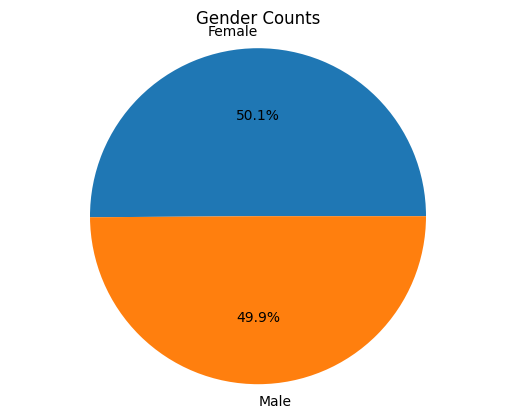

In [ ]:
#Variable:  gender_counts
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%') 
plt.axis('equal')
plt.title('Gender Counts') #tittle
plt.show()

### Tugas Keempat: Menghitung Total Revenue dan Membuat Bar Chart

---



In [ ]:
df['revenue'] = df['Unit price'] * df['Quantity'] # Hitung revenue penjualan untuk setiap baris
total_revenue = df['revenue'].sum() #total revenue penjualan
print("Total Revenue: ", total_revenue) #nilai total revenue
print(df['revenue']) #nilai revenue untuk setiap baris

Total Revenue:  307587.38
0      522.83
1       76.40
2      324.31
3      465.76
4      604.17
        ...  
995     40.35
996    973.80
997     31.84
998     65.82
999    618.38
Name: revenue, Length: 1000, dtype: float64


Total Revenue:  307587.38

Bar Chart

<ipython-input-44-3131642290a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_by_city = df.groupby('City')['Unit price', 'Quantity'].sum()


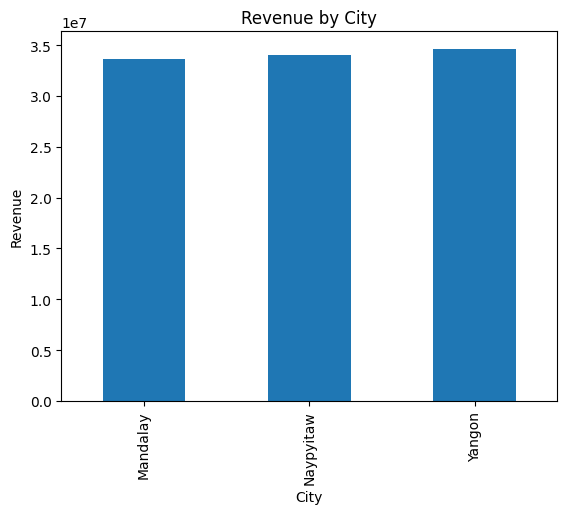

In [ ]:
# Calculate revenue for each city
revenue_by_city = df.groupby('City')['Unit price', 'Quantity'].sum()
revenue_by_city['Revenue'] = revenue_by_city['Unit price'] * revenue_by_city['Quantity']

# Plot the bar chart
revenue_by_city.plot(kind='bar', y='Revenue', legend=False)
plt.xlabel('City') # Set the x-axis label and y-axis label
plt.ylabel('Revenue') 
plt.title('Revenue by City') #tittle
plt.show() # Show the graph

<ipython-input-45-cd7db334ce00>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_by_gender = df.groupby('Gender')['Unit price', 'Quantity'].sum()


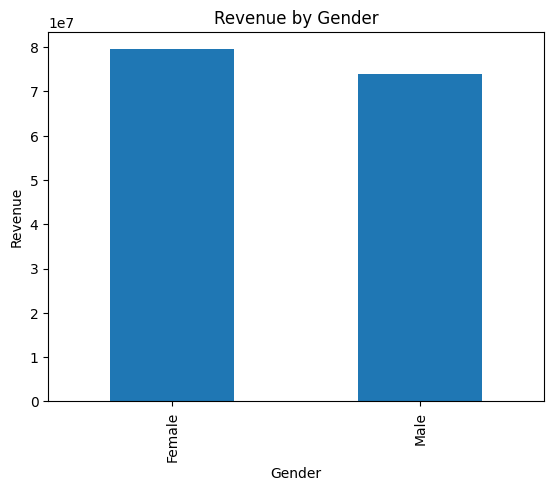

In [ ]:
# Calculate revenue for each Gender
revenue_by_gender = df.groupby('Gender')['Unit price', 'Quantity'].sum()
revenue_by_gender['Revenue'] = revenue_by_gender['Unit price'] * revenue_by_gender['Quantity']

# Plot the bar chart
revenue_by_gender.plot(kind='bar', y='Revenue', legend=False)
plt.xlabel('Gender') # Set the x-axis label and y-axis label
plt.ylabel('Revenue') 
plt.title('Revenue by Gender') #tittle
plt.show() # Show the graph